# Hopefully this is a good place to start - Derek


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from datetime import date
from datetime import datetime

# Explore Details

In [141]:
attendance_18_19 = pd.read_csv('18-19 attendance master.csv')
demog = pd.read_csv('PvH-demographicsdash_childdata.csv')

In [4]:
attendance_18_19

,School Year,ChildID,AttendanceDate,Attendance,Center,Classroom,Session,Session_detail,ProgramType,AbsenceCodeDesc
0,18-19,57894,10/15/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest
1,18-19,61922,11/28/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest
2,18-19,61522,12/7/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest
3,18-19,49392,12/13/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest
4,18-19,52902,12/17/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest
...,...,...,...,...,...,...,...,...,...,...
676475,18-19,59942,6/27/2019,Unexcused Absence,Cox,149.0,PD,PM,Preschool,Unexcused Absence
676476,18-19,61001,9/27/2018,Unexcused Absence,Decoto,40.0,PD,PM,Preschool,Unexcused Absence
676477,18-19,56838,4/8/2019,Unexcused Absence,Grant,109.0,PD,PM,Preschool,Unexcused Absence
676478,18-19,61984,2/26/2019,Unexcused Absence,Hillview,47.0,PD,PM,Preschool,Unexcused Absence


In [6]:
attendance_18_19["Attendance"].value_counts()

In Attendance        554015
Sick                  79336
Best Interest         22262
Other                 14835
Unexcused Absence      6032
Name: Attendance, dtype: int64

In [29]:
demog

,ChildDateofBirth,ChildEthnicity,ChildFlags,ChildID,ChildLanguage,ChildRace
0,06/07/2008,Hispanic or Latino,Limited English,35700.0,01 -- Spanish,Caucasian
1,11/29/2001,Hispanic or Latino,State Preschool,18770.0,01 -- Spanish,Caucasian
2,04/12/2006,Hispanic or Latino,State Preschool,30617.0,00 -- English,Caucasian
3,02/01/2007,Not Hispanic or Latino,Limited English,32428.0,55 -- Other Languages of China,Asian
4,02/14/2011,Not Hispanic or Latino,NaN,38641.0,28 -- Punjabi,NaN
...,...,...,...,...,...,...
83771,02/28/2005,Hispanic or Latino,State Preschool,24303.0,01 -- Spanish,Caucasian
83772,10/11/2009,Hispanic or Latino,NaN,39483.0,01 -- Spanish,Caucasian
83773,02/20/2003,Hispanic or Latino,NaN,40617.0,00 -- English,NaN
83774,07/05/2010,Hispanic or Latino,Limited English,40858.0,01 -- Spanish,Caucasian


In [30]:
demog.isnull() 

,ChildDateofBirth,ChildEthnicity,ChildFlags,ChildID,ChildLanguage,ChildRace
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,True,False,False,True
...,...,...,...,...,...,...
83771,False,False,False,False,False,False
83772,False,False,True,False,False,False
83773,False,False,True,False,False,True
83774,False,False,False,False,False,False


In [31]:
demog["ChildFlags"].value_counts()

Limited English                                7723
Admissions Agreement #14 (check box if Yes)    7116
Preschool                                      6347
Admissions Agreement #15 (check box if Yes)    6064
Admissions Agreement #16 (check box if Yes)    5307
Infant/Toddler                                 2432
School Age                                     2420
State Preschool                                1993
Shelter-In-Place                               1567
Inactive:  Head Start Santa Clara County        950
IEP                                             765
Inactive:  Head Start Alameda County            668
IFSP                                            418
Inclusion Program                               185
Foster Child                                    175
Head Start                                      118
Emergency Care                                   75
Kidango Staff School Age                         46
Inactive:  Head Start CAPE                       39
RCEB        

In [91]:
def combine_unique(arr):
    new_arr = []
    for e in arr:
        if e not in new_arr:
            new_arr.append(e)
    return new_arr

# Attendance Data by Student (Data Frame) cleaned

## ROWS:
 -SID *

## COLUMNS:
-BI count *

-IA count *

-Sick count *

-Other count *

-Unexc count *

-Total days *

-Total days in attendance *

-Total absense (other + unexc + sick) *

-Rate of Attendance *

-Part Day *

-Full Day * 

-Center


In [8]:
attendance_18_19

,School Year,ChildID,AttendanceDate,Attendance,Center,Classroom,Session,Session_detail,ProgramType,AbsenceCodeDesc
0,18-19,57894,10/15/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest
1,18-19,61922,11/28/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest
2,18-19,61522,12/7/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest
3,18-19,49392,12/13/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest
4,18-19,52902,12/17/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest
...,...,...,...,...,...,...,...,...,...,...
676475,18-19,59942,6/27/2019,Unexcused Absence,Cox,149.0,PD,PM,Preschool,Unexcused Absence
676476,18-19,61001,9/27/2018,Unexcused Absence,Decoto,40.0,PD,PM,Preschool,Unexcused Absence
676477,18-19,56838,4/8/2019,Unexcused Absence,Grant,109.0,PD,PM,Preschool,Unexcused Absence
676478,18-19,61984,2/26/2019,Unexcused Absence,Hillview,47.0,PD,PM,Preschool,Unexcused Absence


In [9]:
one_hot_atten = pd.get_dummies(attendance_18_19['Attendance'])
one_hot_sesh = pd.get_dummies(attendance_18_19['Session'])
attendance_clean = attendance_18_19.join(one_hot_atten)
attendance_clean = attendance_clean.join(one_hot_sesh)
attendance_clean

,School Year,ChildID,AttendanceDate,Attendance,Center,Classroom,Session,Session_detail,ProgramType,AbsenceCodeDesc,Best Interest,In Attendance,Other,Sick,Unexcused Absence,FD,PD
0,18-19,57894,10/15/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest,1,0,0,0,0,1,0
1,18-19,61922,11/28/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest,1,0,0,0,0,1,0
2,18-19,61522,12/7/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest,1,0,0,0,0,1,0
3,18-19,49392,12/13/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest,1,0,0,0,0,1,0
4,18-19,52902,12/17/2018,Best Interest,FH,NaN,FD,NaN,FH,Best Interest,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676475,18-19,59942,6/27/2019,Unexcused Absence,Cox,149.0,PD,PM,Preschool,Unexcused Absence,0,0,0,0,1,0,1
676476,18-19,61001,9/27/2018,Unexcused Absence,Decoto,40.0,PD,PM,Preschool,Unexcused Absence,0,0,0,0,1,0,1
676477,18-19,56838,4/8/2019,Unexcused Absence,Grant,109.0,PD,PM,Preschool,Unexcused Absence,0,0,0,0,1,0,1
676478,18-19,61984,2/26/2019,Unexcused Absence,Hillview,47.0,PD,PM,Preschool,Unexcused Absence,0,0,0,0,1,0,1


In [71]:
attendance_18_19_clean = attendance_clean.groupby(['ChildID'],as_index=False).agg({'Best Interest': 'sum','In Attendance': 'sum','Other': 'sum', 'Sick':'sum','Unexcused Absence':'sum', 'FD':'sum','PD':'sum','Center':combine_unique})

attendance_18_19_clean['Total Attendance'] = attendance_18_19_clean['In Attendance']
attendance_18_19_clean['Total Absence'] = attendance_18_19_clean['Other'] + attendance_18_19_clean['Sick'] + attendance_18_19_clean['Unexcused Absence'] + attendance_18_19_clean['Best Interest']
attendance_18_19_clean['Total Days'] = attendance_18_19_clean['Total Attendance'] + attendance_18_19_clean['Total Absence']
attendance_18_19_clean['Attendance Rate'] = attendance_18_19_clean['Total Attendance'] / attendance_18_19_clean['Total Days']

In [72]:
attendance_18_19_clean

,ChildID,Best Interest,In Attendance,Other,Sick,Unexcused Absence,FD,PD,Center,Total Attendance,Total Absence,Total Days,Attendance Rate
0,18578,0,102.0,0,0,0,102.0,0,[FH],102.0,0,102.0,1.000000
1,22717,0,245.0,2,1,0,248.0,0,[FH],245.0,3,248.0,0.987903
2,25173,0,242.0,2,4,0,248.0,0,[FH],242.0,6,248.0,0.975806
3,30829,0,246.0,2,0,0,248.0,0,[FH],246.0,2,248.0,0.991935
4,31583,3,232.0,1,10,0,246.0,0,[Linda Vista],232.0,14,246.0,0.943089
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4781,65271,0,2.0,0,0,0,0.0,2,[Emerald Vista],2.0,0,2.0,1.000000
4782,65289,0,1.0,0,0,0,1.0,0,[Esther Hobbs],1.0,0,1.0,1.000000
4783,65290,0,3.0,0,0,0,3.0,0,[Esther Hobbs],3.0,0,3.0,1.000000
4784,65301,0,1.0,0,0,0,1.0,0,[Castlemont],1.0,0,1.0,1.000000


In [12]:
attendance_18_19_clean["ChildID"].value_counts()

18578    1
60520    1
60516    1
60515    1
60514    1
        ..
57150    1
57143    1
57142    1
57141    1
65308    1
Name: ChildID, Length: 4786, dtype: int64

<AxesSubplot:xlabel='Attendance Rate', ylabel='Count'>

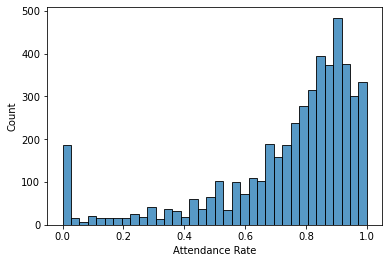

In [13]:
sns.histplot(data = attendance_18_19_clean, x = 'Attendance Rate')

In [14]:
attendance_18_19_clean['Total Absence'].sort_values()

0         0
1542      0
1506      0
1487      0
1469      0
       ... 
2163    129
880     131
2019    140
1842    144
3338    158
Name: Total Absence, Length: 4786, dtype: uint8

# Clean Demog

## ROWS:
-SID

## COLUMNS:
-Race
-Ethnicity
-Age(As of 10/2022)
-Language 

In [142]:
demog

,ChildDateofBirth,ChildEthnicity,ChildFlags,ChildID,ChildLanguage,ChildRace
0,06/07/2008,Hispanic or Latino,Limited English,35700.0,01 -- Spanish,Caucasian
1,11/29/2001,Hispanic or Latino,State Preschool,18770.0,01 -- Spanish,Caucasian
2,04/12/2006,Hispanic or Latino,State Preschool,30617.0,00 -- English,Caucasian
3,02/01/2007,Not Hispanic or Latino,Limited English,32428.0,55 -- Other Languages of China,Asian
4,02/14/2011,Not Hispanic or Latino,NaN,38641.0,28 -- Punjabi,NaN
...,...,...,...,...,...,...
83771,02/28/2005,Hispanic or Latino,State Preschool,24303.0,01 -- Spanish,Caucasian
83772,10/11/2009,Hispanic or Latino,NaN,39483.0,01 -- Spanish,Caucasian
83773,02/20/2003,Hispanic or Latino,NaN,40617.0,00 -- English,NaN
83774,07/05/2010,Hispanic or Latino,Limited English,40858.0,01 -- Spanish,Caucasian


In [85]:
demog_clean = demog[['ChildID','ChildEthnicity','ChildRace','ChildLanguage','ChildFlags','ChildDateofBirth']]

In [88]:
demog_clean = demog_clean[demog_clean['ChildDateofBirth'].notna()]

today = datetime.today() 

def get_age(bday_str):
    datetime_bday = datetime.strptime(str(bday_str),"%m/%d/%Y")
    age = (today-datetime_bday).days // 365
    return age

demog_clean['Age (as of current day)'] = demog_clean['ChildDateofBirth'].apply(get_age)
demog_clean['ChildID'] = demog_clean.ChildID.astype(int)

In [96]:
len(demog_clean['ChildID'].unique())

61512

In [92]:
demog_clean

,ChildID,ChildEthnicity,ChildRace,ChildLanguage,ChildFlags,ChildDateofBirth,Age (as of current day)
0,35700,Hispanic or Latino,Caucasian,01 -- Spanish,Limited English,06/07/2008,14
1,18770,Hispanic or Latino,Caucasian,01 -- Spanish,State Preschool,11/29/2001,20
2,30617,Hispanic or Latino,Caucasian,00 -- English,State Preschool,04/12/2006,16
3,32428,Not Hispanic or Latino,Asian,55 -- Other Languages of China,Limited English,02/01/2007,15
4,38641,Not Hispanic or Latino,NaN,28 -- Punjabi,NaN,02/14/2011,11
...,...,...,...,...,...,...,...
83771,24303,Hispanic or Latino,Caucasian,01 -- Spanish,State Preschool,02/28/2005,17
83772,39483,Hispanic or Latino,Caucasian,01 -- Spanish,NaN,10/11/2009,13
83773,40617,Hispanic or Latino,NaN,00 -- English,NaN,02/20/2003,19
83774,40858,Hispanic or Latino,Caucasian,01 -- Spanish,Limited English,07/05/2010,12


In [127]:
combined_dups = demog_clean.groupby('ChildID').agg({'ChildRace':combine_unique, 'ChildFlags':combine_unique})
merged = combined_dups.merge(demog_clean, on = 'ChildID',how = 'left')

cleaned = merged[['ChildID','ChildEthnicity','ChildLanguage','ChildRace_x','ChildFlags_x','ChildDateofBirth','Age (as of current day)']]
demog_clean_final = cleaned.drop_duplicates(subset= 'ChildID')

In [135]:
demog_clean_final = demog_clean_final.rename(columns = {"ChildRace_x":'ChildRace',"ChildFlags_x":'ChildFlags'})

In [136]:
demog_clean_final

,ChildID,ChildEthnicity,ChildLanguage,ChildRace,ChildFlags,ChildDateofBirth,Age (as of current day)
0,12045,Hispanic or Latino,01 -- Spanish,[Caucasian],"[State Preschool, Limited English]",05/15/2002,20
2,12046,Hispanic or Latino,01 -- Spanish,[Caucasian],[nan],06/17/2004,18
3,12047,Not Hispanic or Latino,00 -- English,[Caucasian],[Preschool],03/17/2004,18
4,12048,Hispanic or Latino,00 -- English,[nan],[School Age],02/21/1992,30
5,12049,Not Hispanic or Latino,00 -- English,[American Indian or Alaskan Native],[nan],08/29/2002,20
...,...,...,...,...,...,...,...
83768,76461,Hispanic or Latino,00 -- English,[nan],[Admissions Agreement #16 (check box if Yes)],09/23/2019,3
83769,76462,Hispanic or Latino,00 -- English,[Caucasian],[nan],03/02/2013,9
83770,76463,Hispanic or Latino,00 -- English,[Caucasian],"[Admissions Agreement #15 (check box if Yes), ...",01/28/2019,3
83773,76464,Not Hispanic or Latino,00 -- English,[Caucasian],[nan],08/28/2019,3


# Master Data, join of demographics with attendance 

In [138]:
Master = pd.merge(demog_clean_final,attendance_18_19_clean, how='inner', on= 'ChildID')

In [139]:
Master

,ChildID,ChildEthnicity,ChildLanguage,ChildRace,ChildFlags,ChildDateofBirth,Age (as of current day),Best Interest,In Attendance,Other,Sick,Unexcused Absence,FD,PD,Center,Total Attendance,Total Absence,Total Days,Attendance Rate
0,18578,Hispanic or Latino,01 -- Spanish,[Caucasian],[Preschool],12/28/2004,17,0,102.0,0,0,0,102.0,0,[FH],102.0,0,102.0,1.000000
1,22717,Hispanic or Latino,01 -- Spanish,[Caucasian],[Infant/Toddler],01/13/2008,14,0,245.0,2,1,0,248.0,0,[FH],245.0,3,248.0,0.987903
2,25173,Hispanic or Latino,00 -- English,[Caucasian],[Preschool],01/06/2007,15,0,242.0,2,4,0,248.0,0,[FH],242.0,6,248.0,0.975806
3,30829,Hispanic or Latino,01 -- Spanish,[Caucasian],[Infant/Toddler],11/19/2010,11,0,246.0,2,0,0,248.0,0,[FH],246.0,2,248.0,0.991935
4,31583,Hispanic or Latino,00 -- English,[Caucasian],[Emergency Care],05/22/2010,12,3,232.0,1,10,0,246.0,0,[Linda Vista],232.0,14,246.0,0.943089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4781,65271,Not Hispanic or Latino,00 -- English,[Caucasian],"[Admissions Agreement #15 (check box if Yes), ...",03/06/2015,7,0,2.0,0,0,0,0.0,2,[Emerald Vista],2.0,0,2.0,1.000000
4782,65289,Not Hispanic or Latino,00 -- English,[Caucasian],[nan],08/15/2016,6,0,1.0,0,0,0,1.0,0,[Esther Hobbs],1.0,0,1.0,1.000000
4783,65290,Hispanic or Latino,00 -- English,[nan],"[Shelter-In-Place, IFSP]",11/14/2017,4,0,3.0,0,0,0,3.0,0,[Esther Hobbs],3.0,0,3.0,1.000000
4784,65301,Hispanic or Latino,01 -- Spanish,[Caucasian],"[IEP, Admissions Agreement #16 (check box if Y...",05/12/2016,6,0,1.0,0,0,0,1.0,0,[Castlemont],1.0,0,1.0,1.000000


In [27]:
from pathlib import Path  
filepath = Path('out.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
Master.to_csv(filepath)

# Demographics of Attendance > 80% vs Attendance < 80 %

# Race, Ethnicity, Age, Location